# Assignment 1 : SMS Spam Classification

## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

## Loading training, validation, test data

In [2]:
train=pd.read_csv("Training Data.csv")
val=pd.read_csv("Validation Data.csv")
test=pd.read_csv("Test Data.csv")

In [3]:
train.head()

,Message,Label
0,need coffee run tomocant believe time week alr...,0
1,need say anything know outsider,0
2,hit move,0
3,yup thk e shop close lor,0
4,ran younger man make pretty baby together,0


In [4]:
val.head()

,Message,Label
0,oh god ive found number im glad text back xaft...,1
1,please leave topicsorry telling,0
2,hello hello hi lou sorry took long 2 reply lef...,0
3,k actually guy meet sunoco howard right way,0
4,dun b sad dun thk abt already concentrate ur p...,0


In [5]:
test.head()

,Message,Label
0,oh k kbut big hitteranyway good,0
1,world suffers lot violence bad people silence ...,0
2,wan2 win meetgreet westlife 4 u m8 currently t...,1
3,dip cell dead coming u better respond else sha...,0
4,tot u reach liao said tshirt,0


In [8]:
y_train,X_train=train["Label"],train["Message"]
y_val,X_val=val["Label"],val["Message"]
y_test,X_test=test["Label"],test["Message"]

## Converting string to vectors, to give as input to the models

In [9]:
# replacing NAN entries by empty string
X_train = X_train.replace(np.nan, '', regex=True)
X_val = X_val.replace(np.nan, '', regex=True)
X_test = X_test.replace(np.nan, '', regex=True)

In [10]:
vector = CountVectorizer().fit(X_train)
X_train_vec=vector.transform(X_train)
X_val_vec=vector.transform(X_val)
X_test_vec=vector.transform(X_test)

In [11]:
X_train_vec.shape

(4026, 7432)

In [12]:
X_train_vec.nnz

34389

In [13]:
# Sparsity %
X_train_vec.nnz*100/(X_train_vec.shape[0]*X_train_vec.shape[1])

0.11493176484176855

In [14]:
X_val_vec.shape

(711, 7432)

In [15]:
X_val_vec.nnz

5264

In [16]:
# Sparsity %
X_val_vec.nnz*100/(X_val_vec.shape[0]*X_val_vec.shape[1])

0.09961863322629629

In [17]:
X_test_vec.shape

(837, 7432)

In [18]:
X_test_vec.nnz

6090

In [19]:
# Sparsity %
X_test_vec.nnz*100/(X_test_vec.shape[0]*X_test_vec.shape[1])

0.09790077587570556

In [20]:
tfidf_transformer = TfidfTransformer()
tfidf_train = tfidf_transformer.fit_transform(X_train_vec)
tfidf_val = tfidf_transformer.fit_transform(X_val_vec)
tfidf_test = tfidf_transformer.fit_transform(X_test_vec)

In [21]:
tfidf_train.shape,tfidf_val.shape,tfidf_test.shape

((4026, 7432), (711, 7432), (837, 7432))

## Training Models

# Multinomial Naive Bayes

In [22]:
for i in np.arange(0.25, 2.25, 0.25):
    spam_detector = MultinomialNB(alpha=i).fit(tfidf_train, y_train)
    y_pred = spam_detector.predict(tfidf_val)
    print(accuracy_score(y_val, y_pred), '\n', classification_report(y_val, y_pred))


0.9859353023909986 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       622
           1       0.99      0.90      0.94        89

    accuracy                           0.99       711
   macro avg       0.99      0.95      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9845288326300985 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       622
           1       0.99      0.89      0.93        89

    accuracy                           0.98       711
   macro avg       0.99      0.94      0.96       711
weighted avg       0.98      0.98      0.98       711

0.9789029535864979 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       622
           1       1.00      0.83      0.91        89

    accuracy                           0.98       711
   macro avg       0.99      0.92      0.95       711
weighted av

In [23]:
mnb = MultinomialNB(alpha=0.5)
mnb.fit(tfidf_train,y_train)

print('training accuracy is --> ',mnb.score(tfidf_train,y_train)*100)

training accuracy is -->  99.03129657228018


In [24]:
print('Validation accuracy is --> ',mnb.score(tfidf_val,y_val)*100)

Validation accuracy is -->  98.45288326300985


In [25]:
print('Test accuracy is --> ',mnb.score(tfidf_test,y_test)*100)

Test accuracy is -->  96.1768219832736


In [26]:
y_pred = mnb.predict(tfidf_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       722
           1       0.99      0.73      0.84       115

    accuracy                           0.96       837
   macro avg       0.97      0.86      0.91       837
weighted avg       0.96      0.96      0.96       837



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


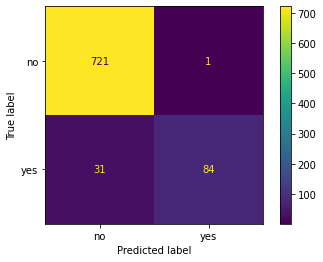

In [28]:
plot_confusion_matrix(mnb ,tfidf_test,y_test,display_labels=['no','yes'])

# Logistic Regression

In [29]:
for i in range(1,1000,100):
    lr = LogisticRegression(C=i)
    lr.fit(tfidf_train, y_train)
    y_pred = lr.predict(tfidf_val)
    print(accuracy_score(y_val, y_pred), '\n', classification_report(y_val, y_pred))

0.9732770745428974 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       622
           1       0.96      0.82      0.88        89

    accuracy                           0.97       711
   macro avg       0.97      0.91      0.93       711
weighted avg       0.97      0.97      0.97       711

0.9887482419127989 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       622
           1       0.97      0.94      0.95        89

    accuracy                           0.99       711
   macro avg       0.98      0.97      0.97       711
weighted avg       0.99      0.99      0.99       711



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9873417721518988 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.94      0.95        89

    accuracy                           0.99       711
   macro avg       0.97      0.97      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9873417721518988 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.94      0.95        89

    accuracy                           0.99       711
   macro avg       0.97      0.97      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9859353023909986 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.93      0.94        89

    accuracy                           0.99       711
   macro avg       0.97      0.96      0.97       711
weighted av

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9859353023909986 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.93      0.94        89

    accuracy                           0.99       711
   macro avg       0.97      0.96      0.97       711
weighted avg       0.99      0.99      0.99       711



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9859353023909986 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.93      0.94        89

    accuracy                           0.99       711
   macro avg       0.97      0.96      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9859353023909986 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.93      0.94        89

    accuracy                           0.99       711
   macro avg       0.97      0.96      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9859353023909986 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.95      0.93      0.94        89

    accuracy                           0.99       711
   macro avg       0.97      0.96      0.97       711
weighted av

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

The model performs best for value of C near 100

In [30]:
lr = LogisticRegression(C=100)
lr.fit(tfidf_train,y_train)
print('training accuracy is --> ',lr.score(tfidf_train,y_train)*100)

training accuracy is -->  100.0


In [31]:
print('Validation accuracy is --> ',lr.score(tfidf_val,y_val)*100)

Validation accuracy is -->  98.87482419127988


In [32]:
print('Test accuracy is --> ',lr.score(tfidf_test,y_test)*100)

Test accuracy is -->  97.84946236559139


In [33]:
y_pred = lr.predict(tfidf_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       722
           1       0.99      0.85      0.92       115

    accuracy                           0.98       837
   macro avg       0.98      0.93      0.95       837
weighted avg       0.98      0.98      0.98       837



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


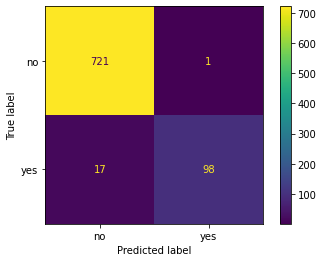

In [35]:
plot_confusion_matrix(lr ,tfidf_test,y_test,display_labels=['no','yes'])

# MLP Classifier

In [36]:
for l_r in ['constant', 'invscaling', 'adaptive']:
    mlp = MLPClassifier( learning_rate=l_r)
    mlp.fit(tfidf_train,y_train)
    y_pred = mlp.predict(tfidf_val)
    print(accuracy_score(y_val, y_pred), '\n', classification_report(y_val, y_pred))

0.9873417721518988 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       622
           1       0.97      0.93      0.95        89

    accuracy                           0.99       711
   macro avg       0.98      0.96      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9887482419127989 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       622
           1       0.97      0.94      0.95        89

    accuracy                           0.99       711
   macro avg       0.98      0.97      0.97       711
weighted avg       0.99      0.99      0.99       711

0.9887482419127989 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       622
           1       0.97      0.94      0.95        89

    accuracy                           0.99       711
   macro avg       0.98      0.97      0.97       711
weighted av

Taking the learning_rate to be 'constant' could have taken 'adaptive' also as both give similar result.

In [37]:
mlp = MLPClassifier( learning_rate='constant')
mlp.fit(tfidf_train,y_train)
print('training accuracy is --> ',mlp.score(tfidf_train,y_train)*100)

training accuracy is -->  100.0


In [38]:
print('Validation accuracy is --> ',mlp.score(tfidf_val,y_val)*100)

Validation accuracy is -->  98.73417721518987


In [39]:
print('Test accuracy is --> ',mlp.score(tfidf_test,y_test)*100)

Test accuracy is -->  97.84946236559139


In [40]:
y_pred = mlp.predict(tfidf_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       722
           1       0.99      0.85      0.92       115

    accuracy                           0.98       837
   macro avg       0.98      0.93      0.95       837
weighted avg       0.98      0.98      0.98       837



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


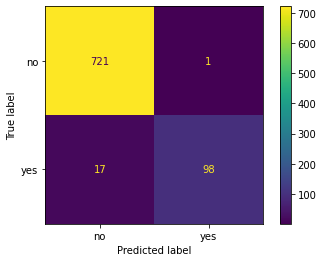

In [42]:
plot_confusion_matrix(mlp ,tfidf_test,y_test,display_labels=['no','yes'])

# Conclusion

As our aim is to reduce False Negative , thus increasing recall.

MLP classifier is the perect match, according to accuracy as well as recall criteria.